In [142]:
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift

#file_store
import os

#time
import time
from datetime import datetime, timedelta


from TWPA_scearch_best_gain import *
def linear_func(x, a, b):
    return a * x + b

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_func, x, y)
    a = popt[0]
    b = popt[1]
    a_err = np.sqrt(pcov[0, 0])
    b_err = np.sqrt(pcov[1, 1])
    return a, b, a_err, b_err

from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_9'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)


# Stable temperature since 02.06.2025

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9 already exists


In [12]:
TWPA = TWPA_best_gain(file_path = adress, file_name = 'Gain_sweep_dense_lower_gain_500mK', 
                      vna = "vna", anapico = "anapico", dc = "dc",
                      dry_run=True)

In [13]:
%matplotlib inline

Database from file 
   C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\Gain_sweep_fixed_power_7db_dense2025-06-06-19-12-26.mat 
uploaded
dict_keys(['__header__', '__version__', '__globals__', 'best_gain_DC', 'best_gain_pp', 'best_gain_pf', 'best_gain', 'rough_dc', 'rough_pf', 'rough_pp', 'database'])
(101, 501, 1) (501,)


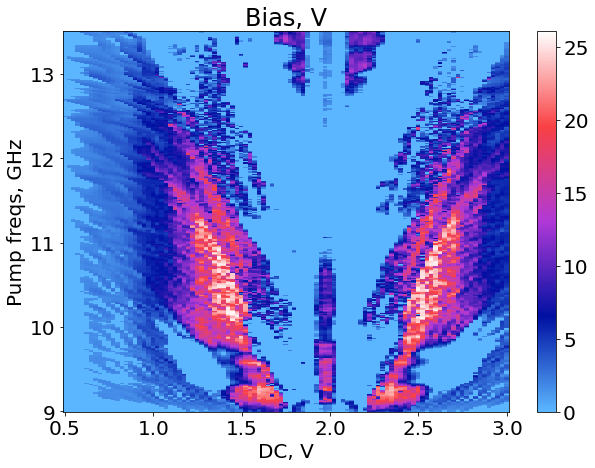

In [14]:
mat = TWPA.load_database(folder_address=adress, file_name="Gain_sweep_fixed_power_7db_dense2025-06-06-19-12-26.mat", last_one=False)

font = {'size'   : 20}
matplotlib.rc('font', **font)

data = TWPA.database['data']
pump_freqs = mat['rough_pf'][0]
pump_powers = mat['rough_pp'][0]
volts = mat['rough_dc'][0]
print(data.shape, pump_freqs.shape)
        
# pump_freqs = TWPA.database['pump_freqs']
# pump_powers = self.database['pump_powers']
# volts = self.database['volts']
        
fig, ax = plt.subplots(figsize=(10,7))
colors = ['#5bb6ff', '#0010a2', '#af39d7', '#f94144', '#ffffff']
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

for i in range(len(volts)):
    for j in range(len(pump_freqs)):
            if data[i,j,0] < 1.5: data[i,j,0] = 0
                
volts_g = volts
pump_freqs_g = pump_freqs
data_g = data[:, :, 0]

c3 = ax.pcolor(volts_g[:], pump_freqs_g / 1e9, data_g[:, :].T, cmap=cmap)
ax.set_title(r'Bias, V')
ax.set_xlabel(r'DC, V')
ax.set_ylabel(r'Pump freqs, GHz')
fig.colorbar(c3, ax=ax, orientation='vertical')
plt.show()


In [15]:
%matplotlib qt

In [16]:
mat = TWPA.load_database(folder_address=adress, file_name="Gain_sweep_1000mK2025-07-17-22-37-20.mat", last_one=False)

font = {'size'   : 20}
matplotlib.rc('font', **font)

data = TWPA.database['data']
pump_freqs = mat['rough_pf'][0]
# pump_powers = mat['rough_pp'][0]
# volts = mat['rough_dc'][0]
# pump_freqs = TWPA.database['pump_freqs']
pump_powers = TWPA.database['pump_powers']
volts_g = TWPA.database['volts'][0]
print(data.shape, pump_freqs.shape)
        
# pump_freqs = TWPA.database['pump_freqs']
# pump_powers = self.database['pump_powers']
# volts = self.database['volts']
        
fig, ax = plt.subplots(figsize=(10,7))
colors = ['#5bb6ff', '#0010a2', '#af39d7', '#f94144', '#ffffff']
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)
                
volts_g = TWPA.database['volts']
pump_freqs_g = pump_freqs

index = 6
for i in range(len(volts_g)):
    for j in range(len(pump_freqs_g)):
            if data[i,j,index] < 1.5: data[i,j,index] = 0
data_g = data[:, :, index]
c3 = ax.pcolor(volts_g[:], pump_freqs_g / 1e9, data_g[:, :].T, cmap=cmap)
ax.set_title(r'Bias, V')
ax.set_xlabel(r'DC, V')
ax.set_ylabel(r'Pump freqs, GHz')
fig.colorbar(c3, ax=ax, orientation='vertical')
plt.show()

Database from file 
   C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\Gain_sweep_1000mK2025-07-17-22-37-20.mat 
uploaded
dict_keys(['__header__', '__version__', '__globals__', 'best_gain_DC', 'best_gain_pp', 'best_gain_pf', 'best_gain', 'rough_dc', 'rough_pf', 'rough_pp', 'database'])
(101, 501, 12) (501,)


In [17]:
fig, ax = plt.subplots(figsize=(10,7))
colors = ['#5bb6ff', '#0010a2', '#af39d7', '#f94144', '#ffffff']
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

index = 7

for i in range(len(volts_g)):
    for j in range(len(pump_freqs_g)):
            if data[i,j,index] < 1.5: data[i,j,index] = 0

data_g = data[:, :, index]

c3 = ax.pcolor(volts_g[:], pump_freqs_g / 1e9, data_g[:, :].T, cmap=cmap)
ax.set_title(r'Bias, V')
ax.set_xlabel(r'DC, V')
ax.set_ylabel(r'Pump freqs, GHz')
fig.colorbar(c3, ax=ax, orientation='vertical')
plt.show()

In [18]:
# create_non_linear_distribution(5.5, 5.5, 1)
pump_powers[20]

3.5

In [31]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'
file = "Noise_sweep_fixed_power_7db_dense_2025-06-06-23-07-23.mat" 
mat = sio.loadmat(initial_folder+"\\"+file)
data_gain = mat['data_gain'][:,:,0]
print("data_gain", data_gain.shape)
volts = mat['volts'][0]
print("Volts", volts.shape)
pump_freqs = mat['pump_freqs'][0]
print("pump_freqs", pump_freqs.shape)
pump_powers = mat['pump_powers'][0]
print("pump_powers", pump_powers.shape)
data_mag = mat['data_mag'][:,:,0] # on/off
print(data_mag.shape)
data_pha = mat['data_pha'][:,:,0] # on/off
print(data_pha.shape)
fft_freq = mat['fft_freq'][0] # on/off
print(fft_freq.shape)

hz1_idx = 60

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(10,7))
colors = ['#5bb6ff', '#0010a2', '#af39d7', '#f94144', '#ffffff']
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

# for i in range(len(volts)):
#     for j in range(len(pump_freqs)):
#             if data[i,j,0] < 1.5: data[i,j,0] = 0
                
volts_n = volts
pump_freqs_n = pump_freqs
data_n = data[:, :, 0]

c3 = ax.pcolor(volts_n[:], pump_freqs_n / 1e9, data_n[:, :].T, cmap=cmap)
ax.set_title(r'Bias, V')
ax.set_xlabel(r'DC, V')
ax.set_ylabel(r'Pump freqs, GHz')
fig.colorbar(c3, ax=ax, orientation='vertical')
plt.show()

data_gain (101, 501)
Volts (101,)
pump_freqs (501,)
pump_powers (1,)
(101, 501, 2, 101)
(101, 501, 2, 101)
(101,)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [20]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'
file = "Noise_sweep_500mK2_2025-07-10-11-33-17.mat" 
mat = sio.loadmat(initial_folder+"\\"+file)
data = mat['data_gain'][:,:,0]
print("data_gain", data_gain.shape)
volts_n = mat['volts'][0]
print("Volts", volts.shape)
pump_freqs_n = mat['pump_freqs'][0]
print("pump_freqs", pump_freqs.shape)
pump_powers = mat['pump_powers'][0]
print("pump_powers", pump_powers.shape)
data_mag = mat['data_mag'][:,:,0] # on/off
print(data_mag.shape)
data_pha = mat['data_pha'][:,:,0] # on/off
print(data_pha.shape)
fft_freq = mat['fft_freq'][0] # on/off
print(fft_freq.shape)

hz1_idx = 60

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(10,7))
colors = ['#5bb6ff', '#0010a2', '#af39d7', '#f94144', '#ffffff']
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

for i in range(len(volts)):
    for j in range(len(pump_freqs)):
            if data[i,j] < 1.5: data[i,j] = 0
                
volts_n = volts
pump_freqs_n = pump_freqs
data_n = data[:, :]

c3 = ax.pcolor(volts_n[:], pump_freqs_n / 1e9, data_n[:, :].T, cmap=cmap)
ax.set_title(r'Bias, V')
ax.set_xlabel(r'DC, V')
ax.set_ylabel(r'Pump freqs, GHz')
fig.colorbar(c3, ax=ax, orientation='vertical')
plt.show()

data_gain (101, 501)
Volts (101,)
pump_freqs (501,)
pump_powers (1,)
(35, 501, 2, 101)
(35, 501, 2, 101)
(101,)


IndexError: index 35 is out of bounds for axis 0 with size 35

In [ ]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'
file = "Noise_sweep_700mK_2025-07-14-18-43-56.mat" 
mat = sio.loadmat(initial_folder+"\\"+file)
data = mat['data_gain'][:,:,0]
print("data_gain", data_gain.shape)
volts_n = mat['volts'][0]
print("Volts", volts.shape)
pump_freqs_n = mat['pump_freqs'][0]
print("pump_freqs", pump_freqs.shape)
pump_powers = mat['pump_powers'][0]
print("pump_powers", pump_powers.shape)
data_mag = mat['data_mag'][:,:,0] # on/off
print(data_mag.shape)
data_pha = mat['data_pha'][:,:,0] # on/off
print(data_pha.shape)
fft_freq = mat['fft_freq'][0] # on/off
print(fft_freq.shape)

hz1_idx = 60

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(10,7))
colors = ['#5bb6ff', '#0010a2', '#af39d7', '#f94144', '#ffffff']
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

for i in range(len(volts)):
    for j in range(len(pump_freqs)):
            if data[i,j] < 1.5: data[i,j] = 0
                
volts_n = volts
pump_freqs_n = pump_freqs
data_n = data[:, :]

c3 = ax.pcolor(volts_n[:], pump_freqs_n / 1e9, data_n[:, :].T, cmap=cmap)
ax.set_title(r'Bias, V')
ax.set_xlabel(r'DC, V')
ax.set_ylabel(r'Pump freqs, GHz')
fig.colorbar(c3, ax=ax, orientation='vertical')
plt.show()

In [21]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'
file = "Noise_sweep_fixed_power_7db_dense_low_gain_19_20_2025-06-12-00-15-28.mat" 
mat_low19 = sio.loadmat(initial_folder+"\\"+file)
data_gain_low19 = mat_low19['data_gain'][:,:,0]
print("data_gain", data_gain_low19.shape)
volts_low19 = mat_low19['volts'][0]
print("Volts", volts_low19.shape)
pump_freqs_low19 = mat_low19['pump_freqs'][0]
print("pump_freqs", pump_freqs_low19.shape)
pump_powers_low19 = mat_low19['pump_powers'][0]
print("pump_powers", pump_powers_low19.shape)
data_mag_low19 = mat_low19['data_mag'][:,:,0] # on/off
print(data_mag_low19.shape)
data_pha_low19 = mat_low19['data_pha'][:,:,0] # on/off
print(data_pha_low19.shape)
fft_freq_low19 = mat_low19['fft_freq'][0] # on/off
print(fft_freq_low19.shape)

hz1_idx = 60

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(10,7))
colors = ['#5bb6ff', '#0010a2', '#af39d7', '#f94144', '#ffffff']
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

for i in range(len(volts_low19)):
    for j in range(len(pump_freqs_low19)):
            if data_gain_low19[i,j] < 1.5: data_gain_low19[i,j] = 0
                
volts_n_low19 = volts_low19
pump_freqs_n_low19 = pump_freqs_low19
data_n_low19 = data_gain_low19[:, :]

c3 = ax.pcolor(volts_n_low19[:], pump_freqs_n_low19 / 1e9, data_gain_low19[:, :].T, cmap=cmap)
ax.set_title(r'Bias, V')
ax.set_xlabel(r'DC, V')
ax.set_ylabel(r'Pump freqs, GHz')
fig.colorbar(c3, ax=ax, orientation='vertical')
plt.show()

data_gain (101, 501)
Volts (101,)
pump_freqs (501,)
pump_powers (1,)
(101, 501, 2, 101)
(101, 501, 2, 101)
(101,)


In [22]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'
file = "Noise_sweep_700mK_2025-07-14-18-43-56.mat" 
mat_low19 = sio.loadmat(initial_folder+"\\"+file)
data_gain_low19 = mat_low19['data_gain'][:,:,0]
print("data_gain", data_gain_low19.shape)
volts_low19 = mat_low19['volts'][0]
print("Volts", volts_low19.shape)
pump_freqs_low19 = mat_low19['pump_freqs'][0]
print("pump_freqs", pump_freqs_low19.shape)
pump_powers_low19 = mat_low19['pump_powers'][0]
print("pump_powers", pump_powers_low19.shape)
data_mag_low19 = mat_low19['data_mag'][:,:,0] # on/off
print(data_mag_low19.shape)
data_pha_low19 = mat_low19['data_pha'][:,:,0] # on/off
print(data_pha_low19.shape)
fft_freq_low19 = mat_low19['fft_freq'][0] # on/off
print(fft_freq_low19.shape)

hz1_idx = 60

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(10,7))
colors = ['#5bb6ff', '#0010a2', '#af39d7', '#f94144', '#ffffff']
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

for i in range(len(volts_low19)):
    for j in range(len(pump_freqs_low19)):
            if data_gain_low19[i,j] < 1.5: data_gain_low19[i,j] = 0
                
volts_n_low19 = volts_low19
pump_freqs_n_low19 = pump_freqs_low19
data_n_low19 = data_gain_low19[:, :]

c3 = ax.pcolor(volts_n_low19[:], pump_freqs_n_low19 / 1e9, data_gain_low19[:, :].T, cmap=cmap)
ax.set_title(r'Bias, V')
ax.set_xlabel(r'DC, V')
ax.set_ylabel(r'Pump freqs, GHz')
fig.colorbar(c3, ax=ax, orientation='vertical')
plt.show()

data_gain (35, 501)
Volts (35,)
pump_freqs (501,)
pump_powers (1,)
(35, 501, 2, 101)
(35, 501, 2, 101)
(101,)


In [23]:
print(len(volts_n))

35


In [32]:
noise_mag = np.ones((len(volts_n), len(pump_freqs_n)))*-7
noise_pha = np.ones((len(volts_n), len(pump_freqs_n)))*-7

noise_mag_ref = np.ones((len(volts_n), len(pump_freqs_n)))*-7
noise_pha_ref = np.ones((len(volts_n), len(pump_freqs_n)))*-7

cut_pos = 51
cut_white = -41
x = fft_freq[cut_pos:]

for pf_idx in range(len(pump_freqs_n)):
#     for v_idx in range(len(volts_n)):
    for v_idx in range(35):
        
        mag_curr = data_mag[v_idx, pf_idx, 0]
        mag_curr_ref = data_mag[v_idx, pf_idx, 1]
        
        pha_curr = data_pha[v_idx, pf_idx, 0]
        pha_curr_ref = data_pha[v_idx, pf_idx, 1]
        
        gain_curr = data_n[v_idx, pf_idx]
           
        y = mag_curr[cut_pos:]/np.power(10, gain_curr/10)
        try:
            am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
            noise_mag[v_idx, pf_idx] = linear_func(np.log10(1), am, bm)
        except: pass
        

        y = mag_curr_ref[cut_pos:]/np.power(10, gain_curr/10)
        try: 
            am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log(y[1:cut_white]))
            noise_mag_ref[v_idx, pf_idx] = linear_func(np.log(1), am, bm)
        except: pass

        y = pha_curr[cut_pos:]
        try:
            am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
            noise_pha[v_idx, pf_idx] = linear_func(np.log10(1), am, bm)
        except: pass
    
        y = pha_curr_ref[cut_pos:]
        try:
            am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
            noise_pha_ref[v_idx, pf_idx] = linear_func(np.log10(1), am, bm)
        except: pass
        
        
        mag_curr_low19 = data_mag_low19[v_idx, pf_idx, 0]
        mag_curr_ref_low19 = data_mag_low19[v_idx, pf_idx, 1]
        
        pha_curr_low19 = data_pha_low19[v_idx, pf_idx, 0]
        pha_curr_ref_low19 = data_pha_low19[v_idx, pf_idx, 1]
        
        y = mag_curr_low19[cut_pos:]/np.power(10, gain_curr/10)
        try:
            am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
            power_1 = linear_func(np.log10(1), am, bm)
            noise_mag[v_idx, pf_idx] = power_1
        except: pass
        

        y = mag_curr_ref_low19[cut_pos:]/np.power(10, gain_curr/10)
        try: 
            am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log(y[1:cut_white]))
            power_ref_1 = linear_func(np.log10(1), am, bm)
            noise_mag_ref[v_idx, pf_idx] = power_ref_1
        except: pass

        y = pha_curr_low19[cut_pos:]
        try:
            am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
            noise_pha[v_idx, pf_idx] = linear_func(np.log10(1), am, bm)
        except: pass
    
        y = pha_curr_ref_low19[cut_pos:]
        try:
            am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
            noise_pha_ref[v_idx, pf_idx] = linear_func(np.log10(1), am, bm)
        except: pass

C:\Users\Demag\AppData\Local\Temp\ipykernel_57216\1268931398.py:25: RuntimeWarning: divide by zero encountered in log10
  am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
C:\Users\Demag\AppData\Local\Temp\ipykernel_57216\1268931398.py:32: RuntimeWarning: divide by zero encountered in log
  am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log(y[1:cut_white]))
C:\Users\Demag\AppData\Local\Temp\ipykernel_57216\1268931398.py:38: RuntimeWarning: divide by zero encountered in log10
  am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
C:\Users\Demag\AppData\Local\Temp\ipykernel_57216\1268931398.py:44: RuntimeWarning: divide by zero encountered in log10
  am, bm, am_err, bm_err = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
C:\Users\Demag\AppData\Local\Temp\ipykernel_57216\1268931398.py:57: RuntimeWarning: divide by zero encountered in log10
  am, bm, am_err, bm_err = linear_fit(np.log

In [33]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
fig2, ax = plt.subplots(1, 2, figsize=(16,7), sharex = True, sharey = True)

c1 = ax[0].pcolor(volts_n[15:], pump_freqs_n[:-150] / 1e9, data_n[15:, :-150].T, cmap=cmap)
ax[0].set_title(r'Gain map, V')
ax[0].set_xlabel(r'DC, V')
ax[0].set_ylabel(r'Pump freqs, GHz')
ax[0].grid(True)
fig.colorbar(c1, ax=ax[0], orientation='vertical')

colors2 = [ '#ffffff', '#006aff19', '#006affe5', '#ff008aff', '#ff0000ff', '#ffde00ff']
cmap2 = LinearSegmentedColormap.from_list('my_cmap', colors2, N=256)


c3 = ax[1].pcolor(volts_n[15:], pump_freqs_n[:-150] / 1e9, noise_mag[15:, :-150].T, cmap=cmap2)
ax[1].set_title(r'Noise map, V')
ax[1].set_xlabel(r'DC, V')
ax[1].grid(True)
fig.colorbar(c3, ax=ax[1], orientation='vertical')
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib qt

In [ ]:
noise_mag

In [ ]:
fig2, ax = plt.subplots(1, 1, figsize=(16,16))
ax.plot(noise_mag.flatten(), noise_pha.flatten(), '.')
# ax.plot(noise_mag_ref.flatten(), noise_pha_ref.flatten(), '.')

# Norm flux quantum

In [4]:
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift

#file_store
import os
import scipy.io as sio
#time
import time
from datetime import datetime, timedelta

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap

initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'

folders = os.listdir(initial_folder)
for i in range(len(folders)):
    if ".fig" in folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folders[i])

[0] -----------> 1st_tone
[1] -----------> Alan_var
[2] -----------> fast_saturation
[3] -----------> Gain_sweep_1000mK2025-07-17-22-37-20.mat
[4] -----------> Gain_sweep_10mK_power_freq2025-07-21-19-09-34.mat
[5] -----------> Gain_sweep_10mK_power_freq_1.382025-07-22-02-40-22.mat
[6] -----------> Gain_sweep_10mK_power_sweep_0.412025-07-22-12-30-24.mat
[7] -----------> Gain_sweep_10mK_power_sweep_0.412025-07-22-12-38-47.mat
[8] -----------> Gain_sweep_10mK_power_sweep_0.412025-07-22-12-40-36.mat
[9] -----------> Gain_sweep_12mK2025-05-29-12-17-35.mat
[10] -----------> Gain_sweep_12mK2025-05-29-13-27-37.mat
[11] -----------> Gain_sweep_12mK2025-06-03-10-58-46.mat
[12] -----------> Gain_sweep_12mK2025-06-03-18-18-22.mat
[13] -----------> Gain_sweep_12mK_test_save2025-06-05-17-57-06.mat
[14] -----------> Gain_sweep_500mK2025-07-08-15-36-23.mat
[15] -----------> Gain_sweep_700mK2025-07-12-17-11-02.mat
[16] -----------> Gain_sweep_dense_lower_gain_500mK2025-07-04-19-17-46.mat
[17] ---------

Noise_sweep_fixed_power_7db_dense_2025-06-06-23-07-23.mat
(101, 501)
0.6
9018000000.0
(101,)
7.0
(101, 501, 2, 101)
(101, 501, 2, 101)


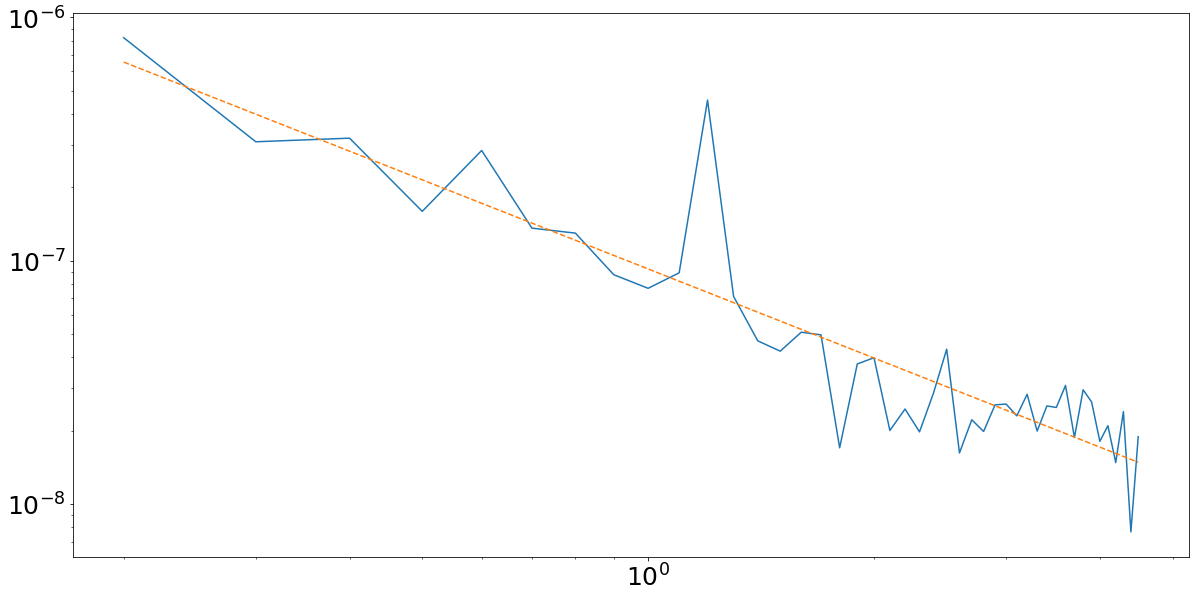

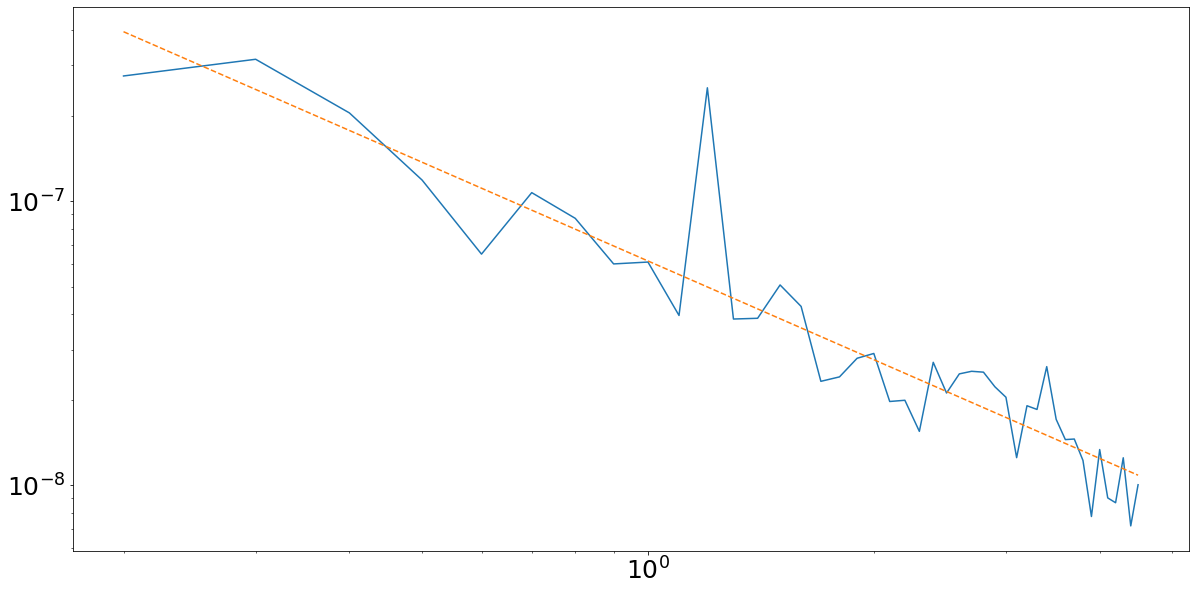

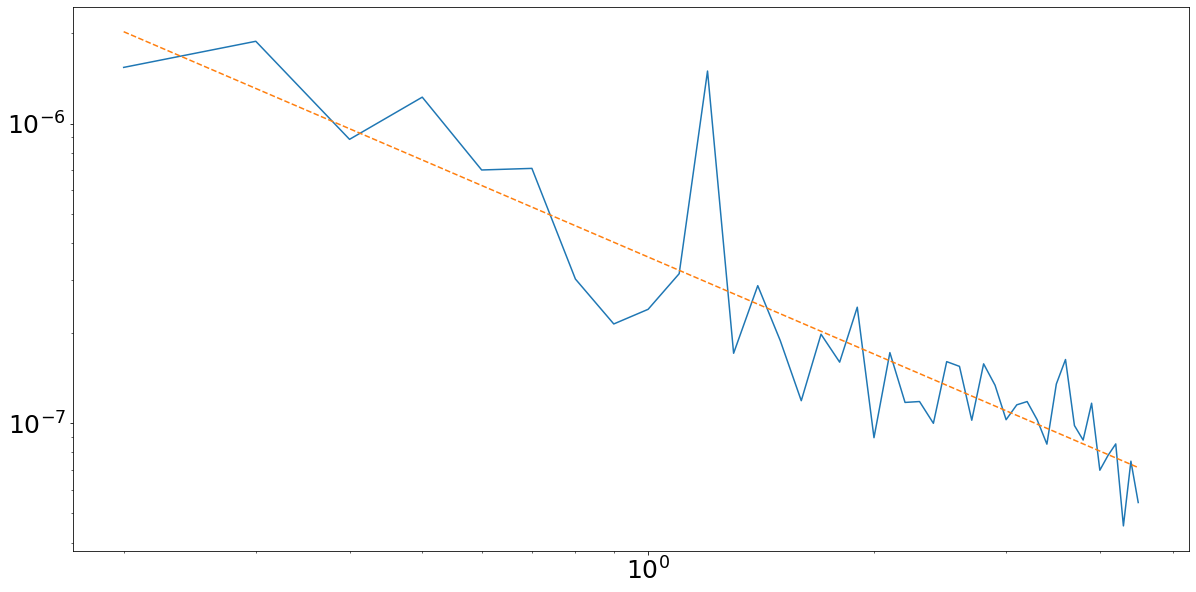

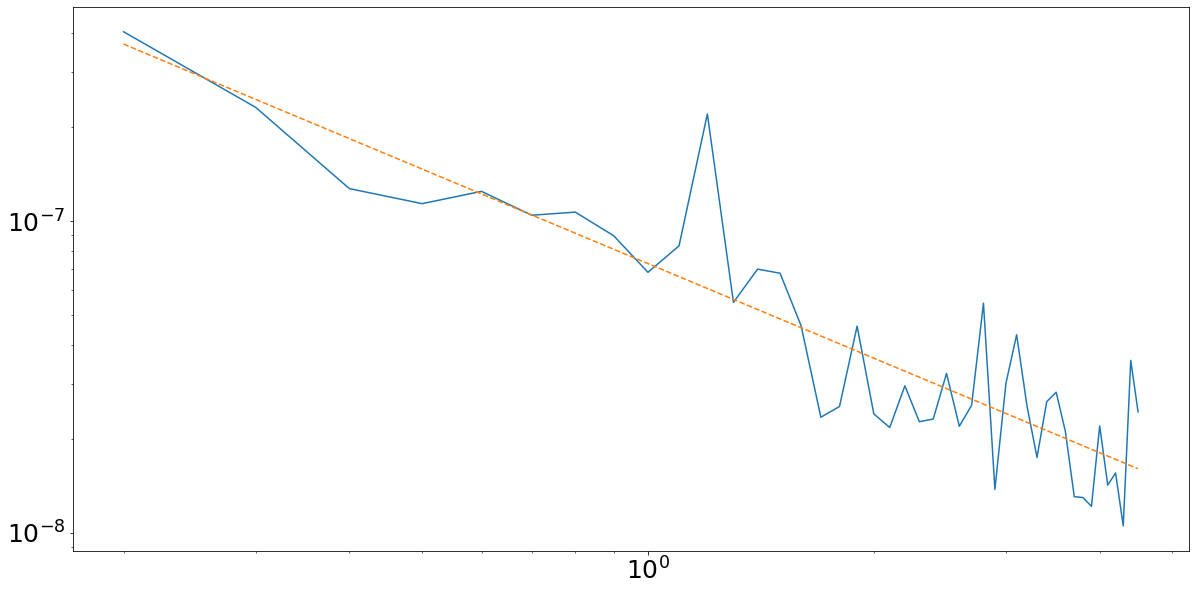

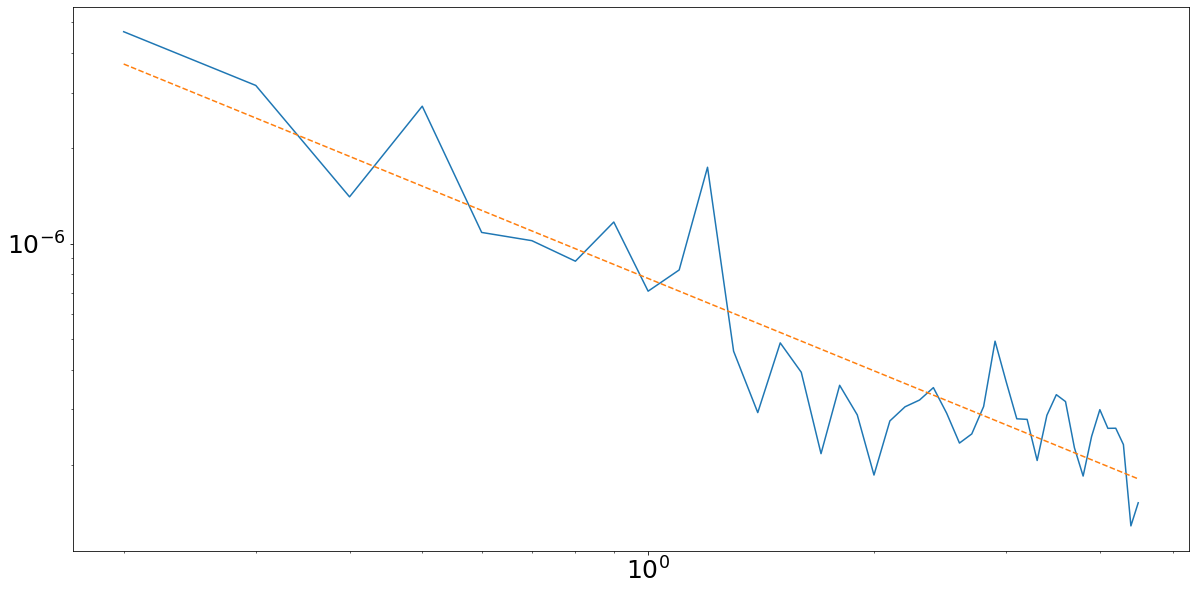

In [173]:
def linear_func(x, a, b):
    return a * x + b

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_func, x, y)
    a = popt[0]
    b = popt[1]
#     a_err = np.sqrt(pcov[0, 0])
#     b_err = np.sqrt(pcov[1, 1])
    return a, b


file = folders[47]
mat_01 = sio.loadmat(initial_folder+"\\"+file)
mat_01.keys()
print(file)

data_gain_01 = mat_01['data_gain'][:,:,0]
print(data_gain_01.shape)
volts_01 = mat_01['volts'][0]
print(volts_01[4])
pump_freqs_01 = mat_01['pump_freqs'][0]
print(pump_freqs_01[2])
fft_freq_01 = mat_01['fft_freq'][0] # on/off
print(fft_freq_01.shape)
N = len(fft_freq_01)

pump_powers_01 = mat_01['pump_powers'][0]
print(pump_powers_01[0])
data_mag_01 = mat_01['data_mag'][:,:,0]/N/10*2 # on/off
print(data_mag_01.shape)
data_pha_01 = mat_01['data_pha'][:,:,0]/N/10*2 # on/off
print(data_pha_01.shape)


noise_mag_01 = np.ones((len(volts_01), len(pump_freqs_01)))*-9
noise_pha_01 = np.ones((len(volts_01), len(pump_freqs_01)))*-9
noise_mag_ref_01 = np.ones((len(volts_01), len(pump_freqs_01)))*-9
noise_pha_ref_01 = np.ones((len(volts_01), len(pump_freqs_01)))*-9

cut_pos = 51
cut_white = -5
x = fft_freq_01[cut_pos:]
ii = 0
for pf_idx in range(len(pump_freqs_01)):
    for v_idx in range(len(volts_01)):
        
        mag_curr_01 = data_mag_01[v_idx, pf_idx, 0]
        mag_curr_ref_01 = data_mag_01[v_idx, pf_idx, 1]
        
        pha_curr_01 = data_pha_01[v_idx, pf_idx, 0]
        pha_curr_ref_01 = data_pha_01[v_idx, pf_idx, 1]
        
        gain_curr_01 = data_gain_01[v_idx, pf_idx]
           
        y = mag_curr_01[cut_pos:]/np.power(10, gain_curr_01/10)
        if  mag_curr_01[cut_pos+1]>0:
            try:
                am, bm = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
                noise_mag_01[v_idx, pf_idx] = linear_func(np.log10(1), am, bm)
               
            except: pass


            y = mag_curr_ref_01[cut_pos:]/np.power(10, gain_curr_01/10)
            try: 
                am, bm = linear_fit(np.log10(x[1:cut_white]), np.log(y[1:cut_white]))
                noise_mag_ref_01[v_idx, pf_idx] = linear_func(np.log(1), am, bm)
            except: pass

            y = pha_curr_01[cut_pos:]
            try:
                am, bm = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
                noise_pha_01[v_idx, pf_idx] = linear_func(np.log10(1), am, bm)
                if ii<5:
                    ii = ii+1
                    fig, ax = plt.subplots(figsize=(20, 10))
                    ax.loglog(x[1:cut_white], y[1:cut_white], '-')
                    ax.loglog(x[1:cut_white], np.power(10, linear_func(np.log10(x[1:cut_white]), am, bm)), '--')
            except: pass

            y = pha_curr_ref_01[cut_pos:]
            try:
                am, bm = linear_fit(np.log10(x[1:cut_white]), np.log10(y[1:cut_white]))
                noise_pha_ref_01[v_idx, pf_idx] = linear_func(np.log10(1), am, bm)
            except: pass
            

In [126]:
initial_folder1 = r'C:\Users\Demag\Downloads'
file1 = initial_folder1+"\\" + "C3C4_.mat" 
mat_c3c4= sio.loadmat(file1, struct_as_record=False, squeeze_me=False)
mat_c3c4.keys()

c3 = mat_c3c4['c3_save']
c4 = mat_c3c4['c4_save']
x = mat_c3c4['x']

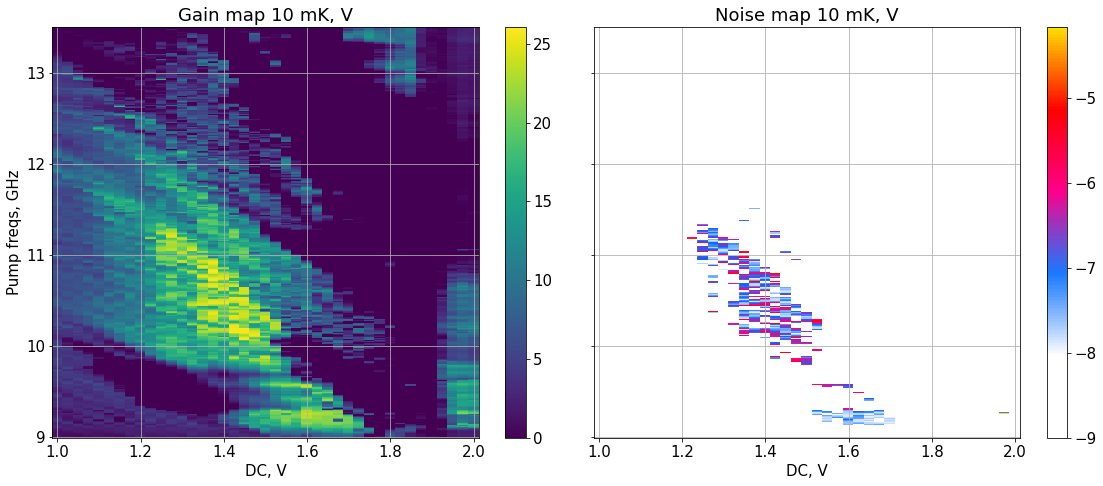

In [127]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

volts = volts_01
data = data_gain_01
data_mag = data_mag_01
data_pha = data_pha_01
fft_freq = fft_freq_01
pump_freqs = pump_freqs_01
noise_mag = noise_mag_01
noise_pha = noise_pha_01

for i in range(len(volts)):
    for j in range(len(pump_freqs)):
        if data[i,j]<0: data[i,j] = 0


fig2, ax = plt.subplots(1, 2, figsize=(16,7), sharex = True, sharey = True)

c1 = ax[0].pcolor(volts[20:-40], pump_freqs / 1e9, data[20:-40].T, cmap='viridis')
ax[0].set_title(r'Gain map 10 mK, V')
ax[0].set_xlabel(r'DC, V')
ax[0].set_ylabel(r'Pump freqs, GHz')
ax[0].grid(True)
fig.colorbar(c1, ax=ax[0], orientation='vertical')

colors2 = ['#ffffff', '#ffffff',  '#006affe5', '#ff008aff', '#ff0000ff', '#ffde00ff']
cmap2 = LinearSegmentedColormap.from_list('my_cmap', colors2, N=256)


c3 = ax[1].pcolor(volts[20:-40], pump_freqs / 1e9, noise_mag[20:-40].T, cmap=cmap2)
ax[1].set_title(r'Noise map 10 mK, V')
ax[1].set_xlabel(r'DC, V')
ax[1].grid(True)
fig.colorbar(c3, ax=ax[1], orientation='vertical')
plt.tight_layout()
plt.show()

In [128]:
max(volts_01[15:]/3.952)

0.7591093117408907

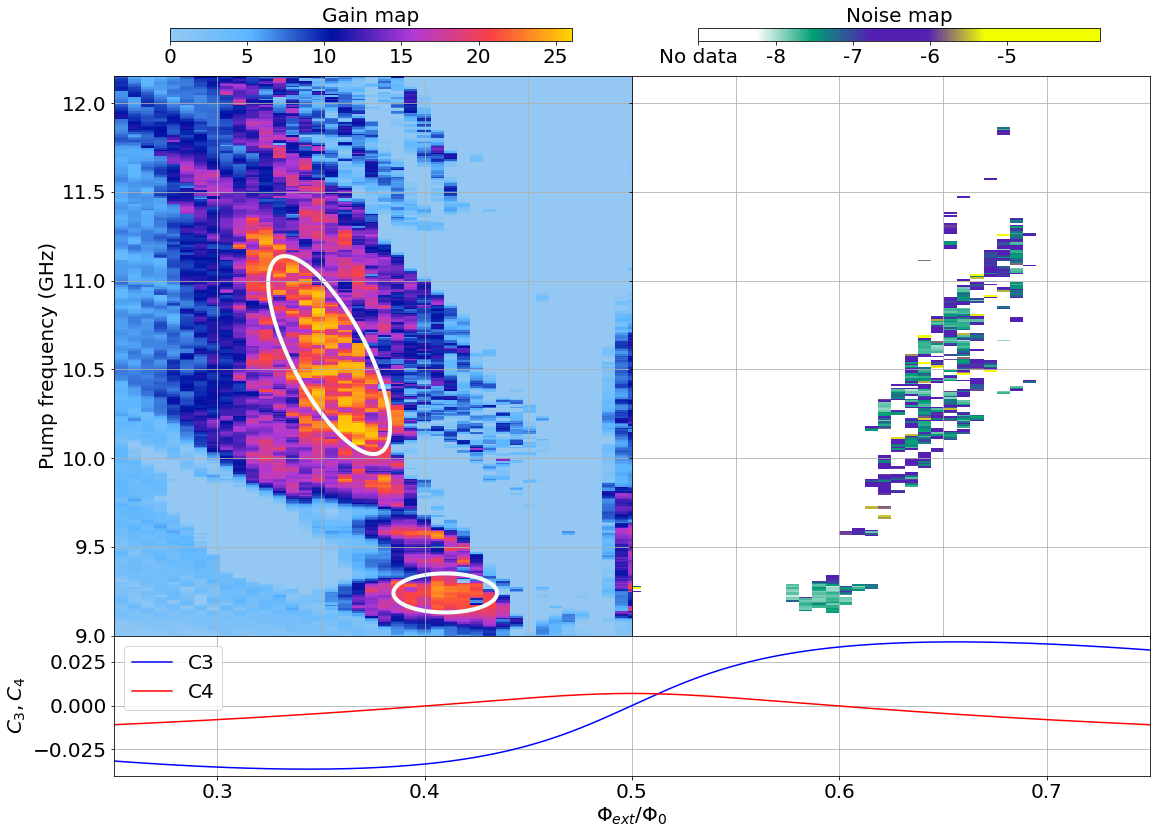

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap

# Font settings
plt.rc('font', size=20)

# Custom colormaps
colors_gain = ['#94C8F2', '#5bb6ff', '#0010a2', '#af39d7', '#f94144', '#FFD500']
cmap_gain = LinearSegmentedColormap.from_list('gain_cmap', colors_gain, N=256)

colors_noise = ['#ffffff', '#ffffff', '#009E73', '#5320b3', '#5320b3',                  # sky blue
    '#f2ff00', '#f2ff00', '#f2ff00']
cmap_noise = LinearSegmentedColormap.from_list('noise_cmap', colors_noise, N=256)


# Prepare data
x_full = volts_01[15:] / 3.937562271670541
y = pump_freqs_01[:-150] / 1e9

for i in range(len(volts_01)):
    for j in range(len(pump_freqs_01)):
        if data_gain_01[i,j]<0: data_gain_01[i,j] = 0

gain_full = data_gain_01[15:, :-150].T
noise_full = noise_mag_01[15:, :-150].T

# Bottom plot data
c3 = mat_c3c4['c3_save'].flatten()
c4 = mat_c3c4['c4_save'].flatten()
x_bottom = mat_c3c4['x'].flatten()

# Create figure layout
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(nrows=2, ncols=2, height_ratios=[4, 1],
              wspace=0, hspace=0, width_ratios=[1, 1])

# Gain subplot (left top)
ax_gain = fig.add_subplot(gs[0, 0])
gain_img = ax_gain.pcolor(x_full, y, gain_full, cmap=cmap_gain, shading='auto')
ax_gain.set_xticklabels([])
ax_gain.set_xlim(0.25, 0.5)
ax_gain.set_ylim(9, 12.1545)
ax_gain.set_ylabel('Pump frequency (GHz)')
ax_gain.grid(True)

# Noise subplot (right top)
ax_noise = fig.add_subplot(gs[0, 1], sharey=ax_gain)
noise_img = ax_noise.pcolor(x_full, y, noise_full, cmap=cmap_noise, shading='auto')
ax_noise.set_xlim(0.5, 0.75)
ax_noise.set_ylim(9, 12.1545)
ax_noise.set_xticklabels([])
ax_noise.tick_params(labelleft=False)
ax_noise.grid(True)

# Colorbars ABOVE the top subplots
pos_gain = ax_gain.get_position()
pos_noise = ax_noise.get_position()

cbar_height = 0.015
cbar_width = pos_gain.width * 0.8
cbar_offset = 0.05  # Adjusted to be inside frame

# Colorbar for gain
cbar_gain_ax = fig.add_axes([
    pos_gain.x0 + (pos_gain.width - cbar_width)/2-0.02,
    pos_gain.y1 + cbar_offset,
    cbar_width,
    cbar_height
])
cb1 = fig.colorbar(gain_img, cax=cbar_gain_ax, orientation='horizontal')
cbar_gain_ax.set_title('Gain map', fontsize=20)


tick_positions = [-9       , -8,  -7, -6, -5]
tick_labels =    ['No data', '-8', '-7', '-6', '-5']

# Colorbar for noise
cbar_noise_ax = fig.add_axes([
    pos_noise.x0 + (pos_noise.width - cbar_width)/2,
    pos_noise.y1 + cbar_offset,
    cbar_width,
    cbar_height
])
cb2 = fig.colorbar(noise_img, cax=cbar_noise_ax, orientation='horizontal')
cbar_noise_ax.set_title('Noise map', fontsize=20)
cb2.set_ticks(tick_positions)
cb2.set_ticklabels(tick_labels)

# Bottom plot (C3 and C4)
ax_bottom = fig.add_subplot(gs[1, :])
ax_bottom.plot(x_bottom, c3, label='C3', color='blue')
ax_bottom.plot(x_bottom, c4, label='C4', color='red')
ax_bottom.set_xlim(0.25, 0.75)
ax_bottom.set_xlabel(r'$\Phi_{ext}/\Phi_{0}$')
ax_bottom.set_ylabel(r'$C_3, C_4$')
ax_bottom.grid(True)
ax_bottom.legend()

# Hide x-tick labels for top plots
plt.setp(ax_gain.get_xticklabels(), visible=False)
plt.setp(ax_noise.get_xticklabels(), visible=False)

# Layout adjustments (increase top margin to fit colorbar titles)
plt.subplots_adjust(left=0.1, right=0.9, top=0.89, bottom=0.08)


from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.patches import PathPatch
from matplotlib.path import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def draw_rotated_ellipse(ax, x_center, y_center, width, height, angle_deg, **kwargs):
    # Number of points for smooth ellipse
    num_points = 100

    # Get axis scale ratio: how many y units per 1 x unit
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Calculate scaling factor to compensate for unequal axes
    # Data units per pixel or similar
    data_ratio = (ylim[1] - ylim[0]) / (xlim[1] - xlim[0])

    # Ellipse parametric coordinates (unit circle scaled by width/2 and height/2)
    t = np.linspace(0, 2*np.pi, num_points)
    x = (width / 2) * np.cos(t)
    y = (height / 2) * np.sin(t)

    # Compensate y by dividing by data_ratio to counteract axis scaling
    y /= data_ratio

    # Convert angle to radians
    angle_rad = np.deg2rad(angle_deg)

    # Rotate the ellipse points
    x_rot = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_rot = x * np.sin(angle_rad) + y * np.cos(angle_rad)

    # Compensate y back by multiplying
    y_rot *= data_ratio

    # Translate ellipse to center
    x_final = x_center + x_rot
    y_final = y_center + y_rot

    # Create Path and PathPatch
    vertices = np.column_stack([x_final, y_final])
    codes = np.full(num_points, Path.LINETO)
    codes[0] = Path.MOVETO

    path = Path(vertices, codes)
    patch = PathPatch(path, **kwargs)

    ax.add_patch(patch)

# Usage example on your ax_gain:

draw_rotated_ellipse(
    ax_gain,
    x_center=0.354,
    y_center=10.58,
    width=0.1,
    height=0.45,
    angle_deg=-60,
    edgecolor='mintcream',
    facecolor='none',
    linewidth=4,
    linestyle='-'
)

draw_rotated_ellipse(
    ax_gain,
    x_center=0.41,
    y_center=9.24,
    width=0.05,
    height=0.22,
    angle_deg=0,
    edgecolor='mintcream',
    facecolor='none',
    linewidth=4,
    linestyle='-'
)

plt.savefig(r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\paper_plots\Gain_noise_c3c4.png", 
            dpi=300, bbox_inches='tight')
plt.show()

In [49]:
0.35*3.937562271670541

1.3781467950846893

# plot 1st tone

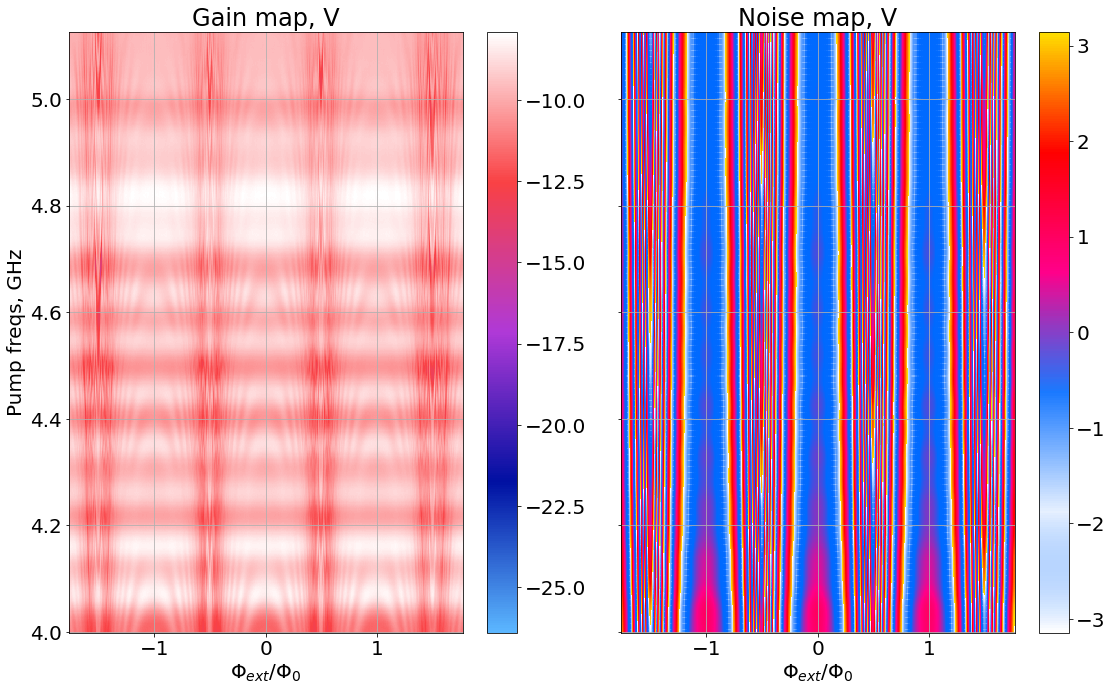

In [41]:
path = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\1st_tone'
file_1 = path+"\\" + '1st_tone_test_with_filter_no_cap_full_DC_scale2025-06-11-18-49-48.mat'

mat_1stone= sio.loadmat(file_1, struct_as_record=False, squeeze_me=False)
mat_1stone.keys()

volts1st = mat_1stone['volts'][0]
mag1st = mat_1stone['mag']
pha1st = mat_1stone['pha']
freqs1st = mat_1stone['freqs'][0]

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig2, ax = plt.subplots(1, 2, figsize=(16,10), sharex = True, sharey = True)

c1 = ax[0].pcolor(volts1st[:]/3.95*1.5/1.5055, freqs1st[:-1500] / 1e9, mag1st[:, :-1500].T, cmap=cmap)
ax[0].set_title(r'Gain map, V')
ax[0].set_xlabel(r'$\Phi_{ext}/\Phi_{0}$')
ax[0].set_ylabel(r'Pump freqs, GHz')
ax[0].grid(True)
fig.colorbar(c1, ax=ax[0], orientation='vertical')

colors2 = [ '#ffffff', '#006aff19', '#006affe5', '#ff008aff', '#ff0000ff', '#ffde00ff']
cmap2 = LinearSegmentedColormap.from_list('my_cmap', colors2, N=256)


c3 = ax[1].pcolor(volts1st[:]/3.952*1.5/1.5055, freqs1st[:-1500] / 1e9, pha1st[:, :-1500].T, cmap=cmap2)
ax[1].set_title(r'Noise map, V')
ax[1].set_xlabel(r'$\Phi_{ext}/\Phi_{0}$')
ax[1].grid(True)
fig.colorbar(c3, ax=ax[1], orientation='vertical')
plt.tight_layout()
plt.show()

In [165]:
3.952*1.5/1.5055

3.937562271670541

In [418]:
mat_high.keys()

dict_keys(['__header__', '__version__', '__globals__', 'best_gain_DC', 'best_gain_pp', 'best_gain_pf', 'best_gain', 'rough_dc', 'rough_pf', 'rough_pp', 'database'])

# POWER SWEEP 

(501, 201) (1,)


C:\Users\Demag\AppData\Local\Temp\ipykernel_25180\3398635034.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


[28, 200]
[42, 200]
Max Gain (Phi=0.41): -21.18 dB at 9.46 GHz, 3.20 dB
Max Gain (Phi=0.35): -29.47 dB at 9.31 GHz, 5.80 dB


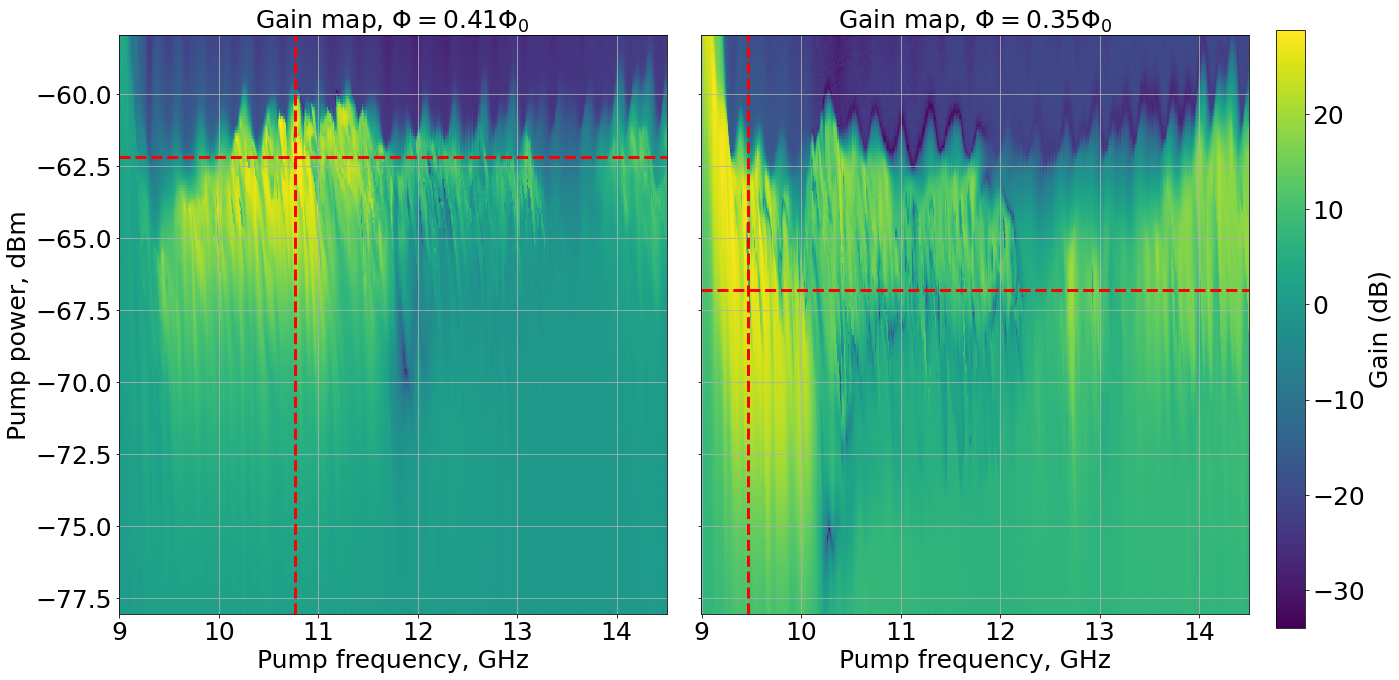

In [171]:
delta = 70
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'
file = "Gain_sweep_10mK_power_freq2025-07-21-19-09-34.mat" 
mat_high = sio.loadmat(initial_folder+"\\"+file)
database_h = mat_high['database']

gain_h = database_h['data'][0, 0][0]
volts_h = database_h['volts'][0, 0][0]
pump_freqs_h = database_h['pump_freqs'][0, 0][0]
pump_powers_h = database_h['pump_powers'][0, 0][0] - delta
print(gain_h.shape, volts_h.shape)


initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'
file = "Gain_sweep_10mK_power_freq_1.382025-07-22-02-40-22.mat" 
mat_low = sio.loadmat(initial_folder+"\\"+file)
database_l = mat_low['database']

gain_l = database_l['data'][0, 0][0]
volts_l = database_l['volts'][0, 0][0]
pump_freqs_l = database_l['pump_freqs'][0, 0][0]
pump_powers_l = database_l['pump_powers'][0, 0][0] - delta

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np  # Make sure this is imported

font = {'size': 25}
matplotlib.rc('font', **font)


colors2 = [ '#ffffff', '#006aff19', '#006affe5', '#ff008aff', '#ff0000ff', '#ffde00ff', '#ffffff', '#006aff19', '#006affe5', '#ff008aff', '#ff0000ff', '#ffde00ff']
cmap2 = LinearSegmentedColormap.from_list('my_cmap', colors2, N=256)

fig2, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# --- Plot 1: High flux ---
cmap_plot = ax[0].pcolor(pump_freqs_l / 1e9, pump_powers_l, gain_l.T, cmap='viridis')
ax[0].set_title(r'Gain map, $\Phi = 0.41 \Phi_{0}$', fontsize=25)
ax[0].set_ylabel('Pump power, dBm')
ax[0].set_xlabel('Pump frequency, GHz')
ax[0].grid(True)

max_power_h = 5.8
max_freq_h = 9.308

# Draw dashed lines at max gain
ax[0].axhline(max_power_h - delta+2, color='r', linestyle='--', linewidth = 3)
ax[0].axvline(10.77, color='r', linestyle='--', linewidth = 3)



# --- Plot 2: Low flux ---
ax[1].pcolor(pump_freqs_h / 1e9, pump_powers_h, gain_h.T, cmap='viridis')
ax[1].set_title(r'Gain map, $\Phi = 0.35 \Phi_{0}$', fontsize=25)
ax[1].set_xlabel('Pump frequency, GHz')
ax[1].grid(True)

max_power_l = 3.2
max_freq_l = 9.46

# Draw dashed lines at max gain
ax[1].axhline(max_power_l - delta, color='r', linestyle='--', linewidth = 3)
ax[1].axvline(max_freq_l, color='r', linestyle='--', linewidth = 3)

# Shared colorbar
cbar_ax = fig2.add_axes([0.9, 0.1, 0.02, 0.83])
cbar = fig2.colorbar(cmap_plot, cax=cbar_ax)
cbar.set_label('Gain (dB)')

plt.tight_layout(rect=[0, 0, 0.9, 1])

max_idx_h1 = find_nearest_index(pump_freqs_h/1e9, max_freq_h)
max_idx_h2 = find_nearest_index(pump_powers_h, max_power_h)
max_idx_h = [max_idx_h1, max_idx_h2]

max_idx_l1 = find_nearest_index(pump_freqs_l/1e9, max_freq_l)
max_idx_l2 = find_nearest_index(pump_powers_l, max_power_l)
max_idx_l = [max_idx_l1, max_idx_l2]
print(max_idx_h)
print(max_idx_l)


# Optionally, print the max values
print(f"Max Gain (Phi=0.41): {gain_l[max_idx_l1, max_idx_l2]:.2f} dB at {max_freq_l:.2f} GHz, {max_power_l:.2f} dB")
print(f"Max Gain (Phi=0.35): {gain_h[max_idx_h1, max_idx_h2]:.2f} dB at {max_freq_h:.2f} GHz, {max_power_h:.2f} dB")
plt.savefig(r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\paper_plots\gain_power_freq_sweep.png", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
%matplotlib inline

In [598]:
for i in range(len(gain_h)):
    gh1 = gain_h[i]
    for j in range(len(gh1)):
        gh2 = gh1[j]
        if gh2>25.3:
            print(pump_freqs_h[i]/1e9, pump_powers_h[j], gh2)

9.132 10.0 25.31456
9.132 10.100000000000001 25.31343
9.132 10.2 25.30066
9.308 5.600000000000001 25.31136
9.308 5.700000000000001 25.39149
9.308 5.800000000000001 25.45656
9.308 5.9 25.4077
9.451 5.700000000000001 25.79556
9.451 5.800000000000001 25.85113
9.451 5.9 25.86424


In [589]:
gain_h.shape

(501, 201)

In [590]:
pump_freqs_h.shape

(501,)

In [558]:
41/12*101/60

5.751388888888888